In [1]:
#import packages needed to run the notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.backends.backend_pdf import PdfPages
from scipy.interpolate import UnivariateSpline
from scipy import stats as st
from statannotations.Annotator import Annotator
import nbconvert
import sys, matplotlib

In [2]:
#Folder were movies, csv and label image are saved
input_folder = '/Users/bdiazroh/Desktop/Projects/COBA/Edwards/Analysis/'
#Folder were graphs and created files will be stored
output_folder = '/Users/bdiazroh/Desktop/Projects/COBA/Edwards/results/'
#chage this number if a different number of stimuli
number_stimuli = 8

In [3]:
#Get the unique names of each movie
file_list = os.listdir(input_folder)
movie_list = []
for file in file_list:
    if file[-4:]==".csv":
        movie = file.split("_")[0]
        if movie not in movie_list:
            movie_list.append(movie)
print(movie_list)

['KO4', 'Stream']


/var/folders/20/_xzm376s3xj53mtzs3c2zkzc0000gp/T/ipykernel_56766/140123546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append({'stimuli': i, 'No_of_Events': events_csv['TRACK_ID'].max()}, ignore_index=True)
/var/folders/20/_xzm376s3xj53mtzs3c2zkzc0000gp/T/ipykernel_56766/140123546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append({'stimuli': i, 'No_of_Events': events_csv['TRACK_ID'].max()}, ignore_index=True)
/var/folders/20/_xzm376s3xj53mtzs3c2zkzc0000gp/T/ipykernel_56766/140123546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append({'stimuli': i, 'No_of_Events': events_csv['TRACK_ID'].max()}, ignore_index=True)
/var/folders/20/_xzm376s3xj53mtzs3c2zkzc0000gp/T/ipykernel_56766/14

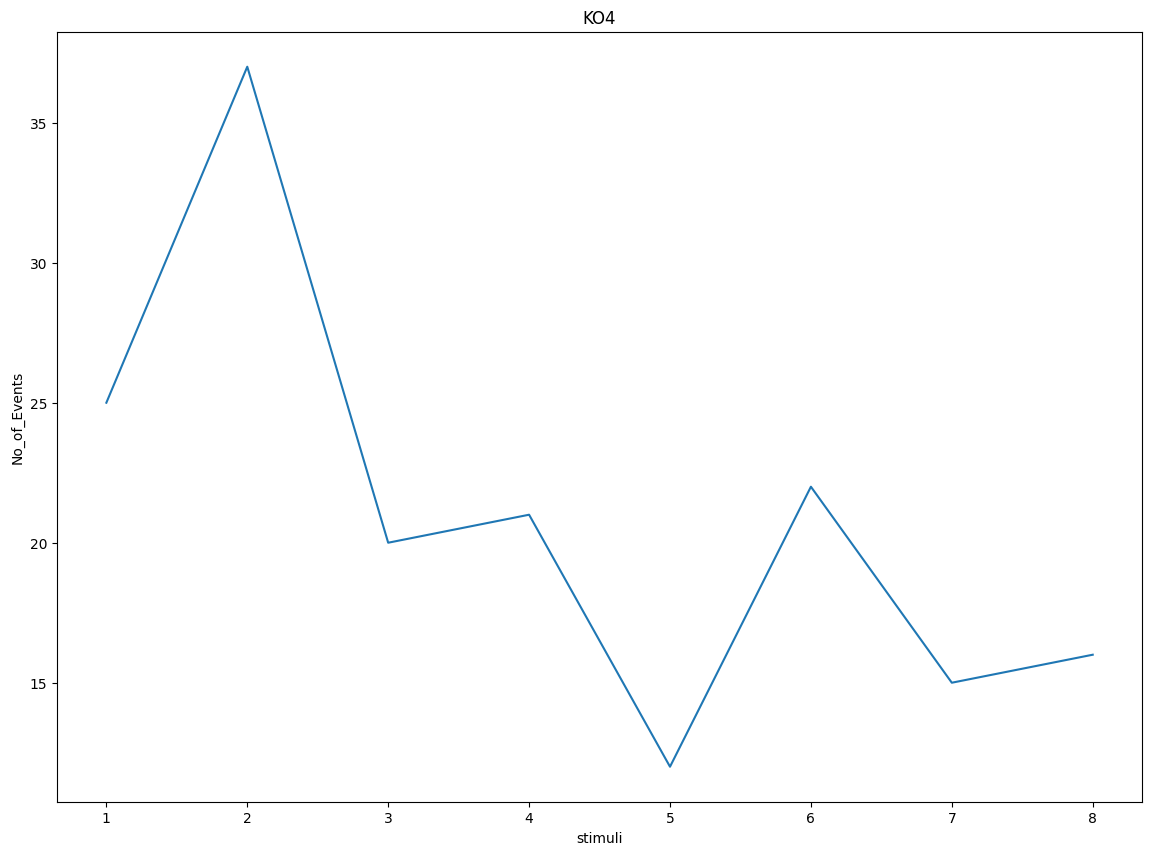

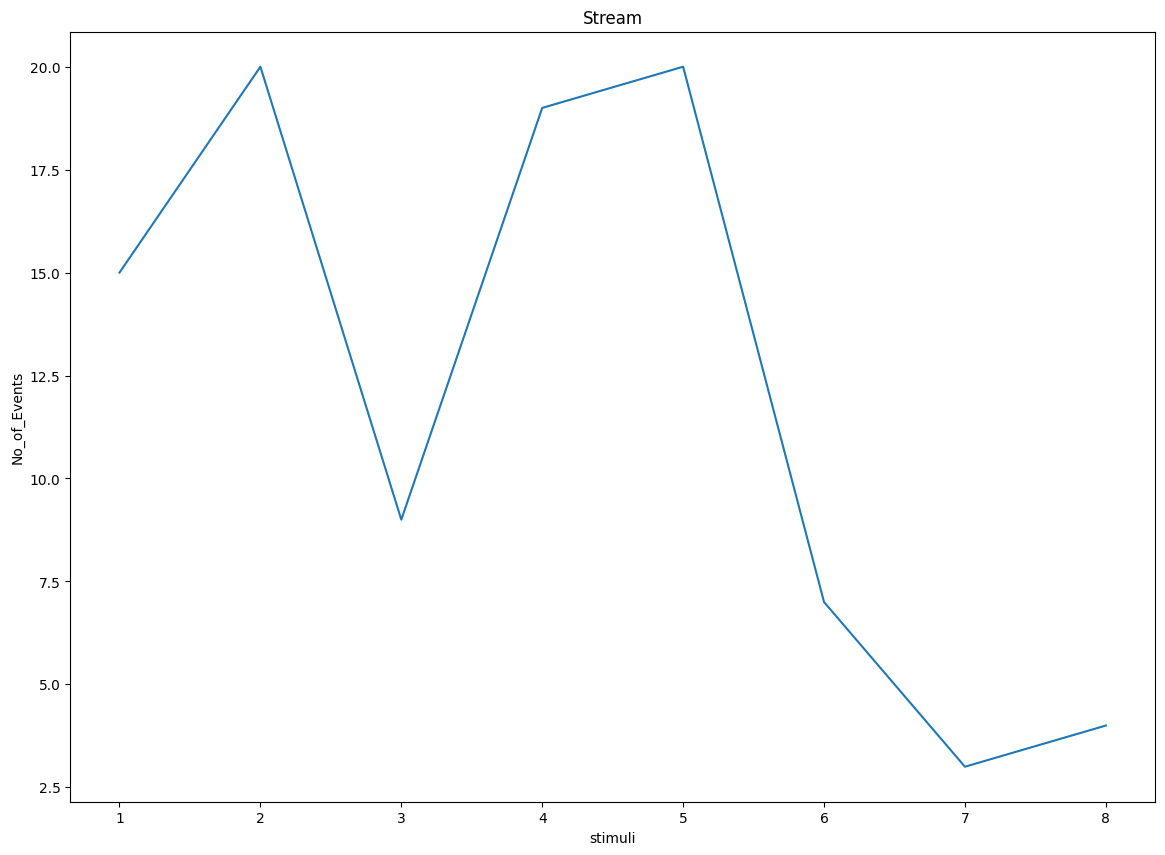

In [5]:
#Get number of events for each stimuli and save in new csv file and create a graph
for movie in movie_list:
    df = pd.DataFrame(columns=['stimuli', 'No_of_Events'])
    for i in range (1,int(number_stimuli)+1):
        cols = 'TRACK_ID'
        events_csv = pd.read_csv(os.path.join(input_folder,movie+'_img'+str(i)+'.csv'))
        df= df.append({'stimuli': i, 'No_of_Events': events_csv['TRACK_ID'].max()}, ignore_index=True)
    
    fig, ax = plt.subplots(1,1, figsize=(14,10))
    ax = sns.lineplot(data=df, x="stimuli", y="No_of_Events",)
    ax.set_title(movie)
    ax.get_figure().savefig(os.path.join(output_folder, movie + 'events_stimuli.pdf'))
    
    df.to_csv(os.path.join(output_folder, movie + 'events_stimuli.csv')) 
